### EDA 1

In [14]:
import os
import csv
import pandas as pd
from datetime import date
import datetime 
import twint
import matplotlib.pyplot as plt

In [4]:
directory = 'C:\\Google NEU\DS5230 Unsupervised Machine Learning & Data Mining\\Project\\data\\Health_Tweets\\'
tweets = pd.read_csv('C:\\Users\\Insti\\Desktop\\input\\health_tweets.csv')

# Create labels for news sources
user_handle_list=['bbchealth', 'cnnhealth', 'foxnewshealth',
                   'goodhealth', 'khnews', 'latimeshealth',
                   'nbcnewshealth', 'nprhealth', 'nythealth', 'reuters_health',
                   'usnewshealth', 'wsjhealth', 'timehealth', 'harvardhealth']


In [5]:
def tweetsby(data):
    #add year column
    data['Year'] = 0
#    data['2014']=0
#    data['2015']=0
#    data['2016']=0
#    data['2017']=0
#    data['2018']=0
#    data['2019']=0
#    data['2020']=0
    for i in range(len(data)):
        date_tmp = datetime.datetime.strptime(data.iloc[i][1], '%Y-%m-%d %H:%M:%S')
        if date_tmp.year == 2014:
            data.loc[i,'Year'] = 2014
        elif date_tmp.year == 2015:
            data.loc[i,'Year'] = 2015
        elif date_tmp.year == 2016:
            data.loc[i,'Year'] = 2016
        elif date_tmp.year == 2017:
            data.loc[i,'Year'] = 2017
        elif date_tmp.year == 2018:
            data.loc[i,'Year'] = 2018
        elif date_tmp.year == 2019:
            data.loc[i,'Year'] = 2019
        else:
            data.loc[i,'Year'] = 2020
    #tweets by year
    tweetbyyear_df = data.groupby(['Year']).size().reset_index(name='counts')
    #tweets by source
    tweetbysource_df = data.groupby(['username']).size().reset_index(name='counts')
    return tweetbyyear_df, tweetbysource_df

In [21]:
tweets_yr, tweets_source = tweetsby(tweets)

In [22]:
tweets_yr

,Year,counts
0,2014,27045
1,2015,29094
2,2016,33445
3,2017,33916
4,2018,31207
5,2019,25479
6,2020,9592


In [25]:
tweets_source = tweets_source.sort_values(by = ['counts'], ascending = False)

In [31]:
tweets_source

,username,counts
5,NYTHealth,37560
12,foxnewshealth,20240
6,Reuters_Health,19680
11,cnnhealth,14364
8,USNewsHealth,14157
3,NBCNewsHealth,13882
0,GdnHealthcare,13599
2,KHNews,12472
4,NPRHealth,12363
10,bbchealth,10475


In [7]:
def most_liked_rt(data):
    #most liked
    ml_tmp_df = data.groupby(['username'])['nlikes'].transform(max) == data['nlikes']
    ml_df = data[ml_tmp_df]
    #most retweeted
    mr_tmp_df = data.groupby(['username'])['nretweets'].transform(max) == data['nretweets']
    mr_df = data[mr_tmp_df]
    return ml_df, mr_df

In [8]:
tweets_mostliked, tweets_mostrt = most_liked_rt(tweets)

In [12]:
tweets_mostliked

,id,date,timezone,tweet,hashtags,username,name,day,hour,retweet,nlikes,nreplies,nretweets,Year
2952,911014666398203904,2017-09-21 23:49:56,UTC,New antibody attacks 99% of HIV strains http:/...,[],bbchealth,BBC Health News,3,0,False,960,18,745,2017
11488,1103100010181414913,2019-03-06 01:08:31,UTC,The US Food and Drug Administration approved J...,[],cnnhealth,CNN Health,3,13,False,7874,544,3773,2019
28039,806211618384187392,2016-12-06 19:00:03,UTC,Texas Lowe's hires disabled veteran and his se...,[],foxnewshealth,Fox News Health,6,16,False,578,16,157,2016
50290,814159985429118977,2016-12-28 17:24:01,UTC,Nick Robinson: “This is a country with huge ad...,[],GdnHealthcare,Guardian Healthcare,2,0,False,198,8,203,2016
60323,1104850927717175296,2019-03-10 21:06:02,UTC,The best medicine for back pain may be good ol...,"['#harvardhealth', '#exercise']",HarvardHealth,Harvard Health,5,4,False,4610,265,2485,2019
70502,1100496650454425600,2019-02-26 20:43:42,UTC,More than 42% of the 9.5 million people diagno...,[],KHNews,Kaiser Health News,1,16,False,2574,150,2718,2019
80091,1098238357870497792,2019-02-20 15:10:03,UTC,Work out like Chris Hemsworth: 'Avengers' acto...,[],latimeshealth,L.A. Times Health,6,23,False,5666,63,463,2019
89640,875767891316137984,2017-06-16 17:31:50,UTC,More adults have died from eating laundry pods...,[],NBCNewsHealth,NBC News Health,5,10,False,6809,538,4019,2017
99615,1061766153771483136,2018-11-11 23:42:32,UTC,"After NRA Mocks Doctors, Physicians Reply: 'Th...",[],NPRHealth,NPR Health News,1,20,False,1171,17,574,2018
109504,1243280690101260290,2020-03-26 20:56:30,UTC,Breaking News: The U.S. now has more coronavir...,[],NYTHealth,NYT Health,1,13,False,2128,502,1796,2020


In [32]:
tweets_mostrt

,id,date,timezone,tweet,hashtags,username,name,day,hour,retweet,nlikes,nreplies,nretweets,Year
2952,911014666398203904,2017-09-21 23:49:56,UTC,New antibody attacks 99% of HIV strains http:/...,[],bbchealth,BBC Health News,3,0,False,960,18,745,2017
11488,1103100010181414913,2019-03-06 01:08:31,UTC,The US Food and Drug Administration approved J...,[],cnnhealth,CNN Health,3,13,False,7874,544,3773,2019
41307,532208074199547904,2014-11-11 16:27:47,UTC,Freedom is not free. Have you hugged a veteran...,['#usa'],foxnewshealth,Fox News Health,5,23,False,334,10,354,2014
54791,655009222707552256,2015-10-16 13:15:42,UTC,New: We junior doctors are fighting to keep th...,"['#juniorcontract', '#notfairnotsafe', '#junio...",GdnHealthcare,Guardian Healthcare,2,13,False,108,4,236,2015
60323,1104850927717175296,2019-03-10 21:06:02,UTC,The best medicine for back pain may be good ol...,"['#harvardhealth', '#exercise']",HarvardHealth,Harvard Health,5,4,False,4610,265,2485,2019
70502,1100496650454425600,2019-02-26 20:43:42,UTC,More than 42% of the 9.5 million people diagno...,[],KHNews,Kaiser Health News,1,16,False,2574,150,2718,2019
80091,1098238357870497792,2019-02-20 15:10:03,UTC,Work out like Chris Hemsworth: 'Avengers' acto...,[],latimeshealth,L.A. Times Health,6,23,False,5666,63,463,2019
89640,875767891316137984,2017-06-16 17:31:50,UTC,More adults have died from eating laundry pods...,[],NBCNewsHealth,NBC News Health,5,10,False,6809,538,4019,2017
99615,1061766153771483136,2018-11-11 23:42:32,UTC,"After NRA Mocks Doctors, Physicians Reply: 'Th...",[],NPRHealth,NPR Health News,1,20,False,1171,17,574,2018
109504,1243280690101260290,2020-03-26 20:56:30,UTC,Breaking News: The U.S. now has more coronavir...,[],NYTHealth,NYT Health,1,13,False,2128,502,1796,2020


### Bar Chart of Tweets by year

Text(0, 0.5, 'Number of Tweets')

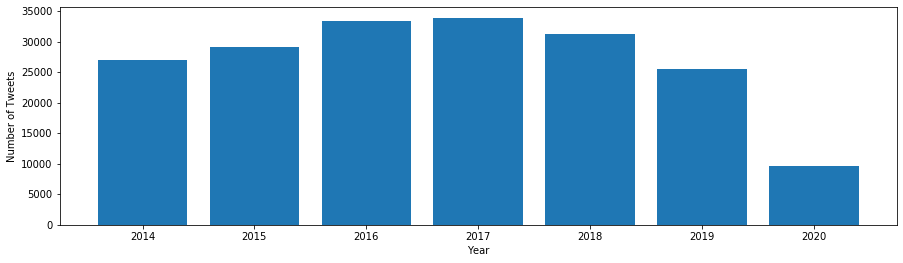

In [35]:
fig = plt.figure()
fig.set_figwidth(15)
plt.bar(tweets_yr['Year'], tweets_yr['counts'])
plt.xlabel('Year')
plt.ylabel('Number of Tweets')

### Bar Chart of Tweets by Source

Text(0, 0.5, 'Bigrams')

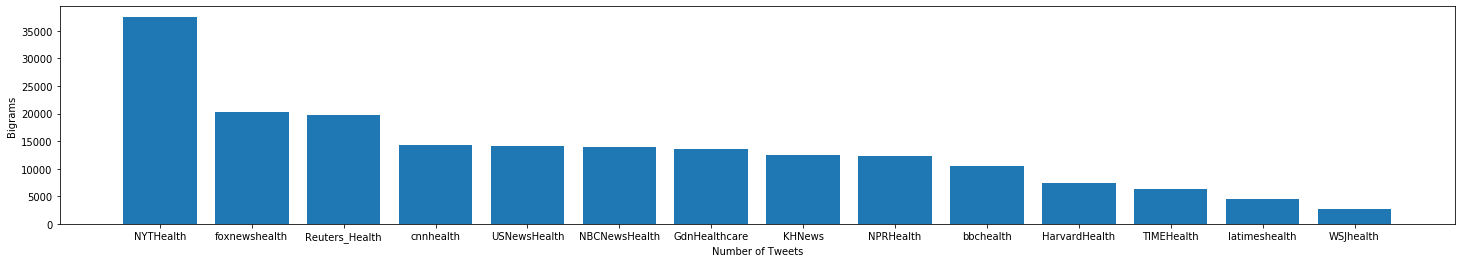

In [34]:
tweets_source_plot = tweets_source.sort_values(by = ['counts'], ascending = False)

fig = plt.figure()
fig.set_figwidth(25)
plt.bar(tweets_source_plot['username'], tweets_source_plot['counts'])
plt.xlabel('Number of Tweets')
plt.ylabel('Bigrams')